In [1]:
library(tidyverse) ## basics
library(survival) ## survival analysis
library(survminer) ## survival plotting

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [2]:
# load metadata
metadata <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/metadata.tsv", sep='\t')

# load alpha diversity
shannon <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/shannon_tabulated.tsv", sep='\t')
faith <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/faith_pd_tabulated.tsv", sep='\t')
asv <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/observed_features_tabulated.tsv", sep='\t')
chao1 <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/chao1_tabulated.tsv", sep='\t')

# rename SampleID column
shannon <- rename(shannon, SampleID=X)
faith <- rename(faith, SampleID=X)
asv <- rename(asv, SampleID=X)
chao1 <- rename(chao1, SampleID=X)

# merge alpha diversity with metadata
metadata <- merge(metadata,shannon, by = c("SampleID"))
metadata <- merge(metadata,chao1, by = c("SampleID"))
metadata <- merge(metadata,asv, by = c("SampleID"))
metadata <- merge(metadata,faith, by = c("SampleID"))

# filter metadata
metadata <- filter(metadata, Genotype=="KO" | Genotype=="WT" | Genotype=="KO_IL17")
metadata <- filter(metadata, Experiment=="exp_1" | Experiment=="exp_2")
meta_wtko <- filter(metadata, Genotype=="KO" | Genotype=="WT")
meta_wtko17 <- filter(metadata, Genotype=="WT" | Genotype=="KO_IL17")
meta_koko17 <- filter(metadata, Genotype=="KO" | Genotype=="KO_IL17")


## Survival depending on metadata

In [3]:
# null model
cox.model <- coxph(Surv(Survival_day, Death)~1, data=metadata)
summary(cox.model)

Call:  coxph(formula = Surv(Survival_day, Death) ~ 1, data = metadata)

Null model
  log likelihood= -17.1444 
  n= 20 

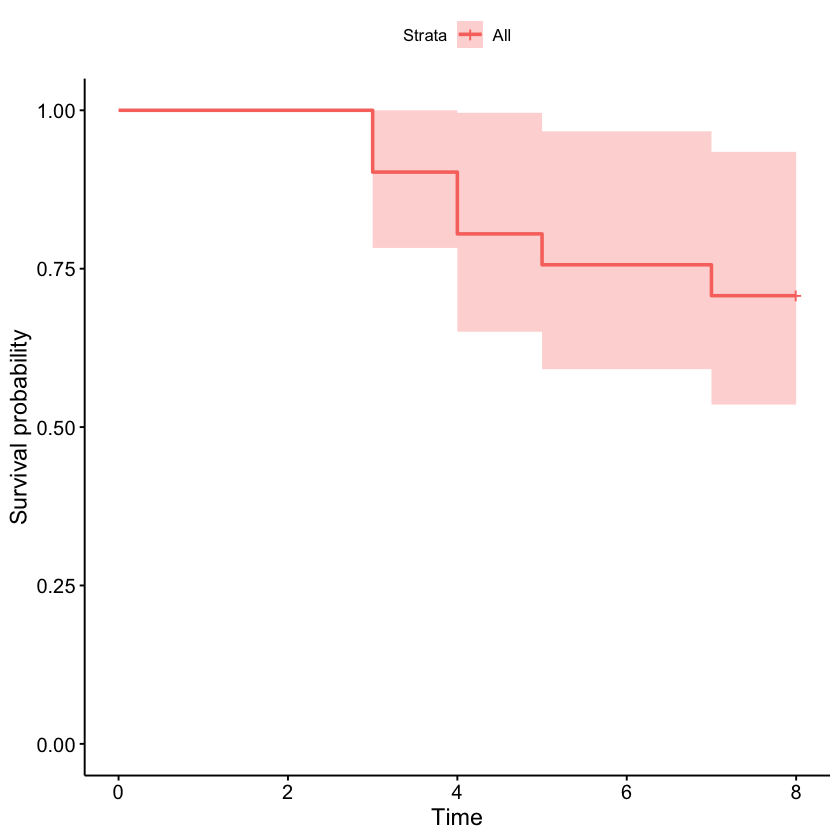

In [4]:
ggsurvplot(survfit(cox.model), data=metadata)

In [5]:
# model genotype 3 groups
cox.model.geno <- coxph(Surv(Survival_day, Death)~Genotype, data=metadata)
summary(cox.model.geno)
# model genotype 2 groups (WT vs KO)
cox.model.geno.wtko <- coxph(Surv(Survival_day, Death)~Genotype, data=meta_wtko)
summary(cox.model.geno.wtko)
# model genotype 2 groups (KO vs KO+IL-17)
cox.model.geno.koko17 <- coxph(Surv(Survival_day, Death)~Genotype, data=meta_koko17)
summary(cox.model.geno.koko17)

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”


Call:
coxph(formula = Surv(Survival_day, Death) ~ Genotype, data = metadata)

  n= 20, number of events= 6 

                      coef  exp(coef)   se(coef)      z Pr(>|z|)  
GenotypeKO_IL17 -2.149e+01  4.664e-10  1.669e+04 -0.001   0.9990  
GenotypeWT      -2.195e+00  1.114e-01  1.111e+00 -1.976   0.0481 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                exp(coef) exp(-coef) lower .95 upper .95
GenotypeKO_IL17 4.664e-10  2.144e+09   0.00000       Inf
GenotypeWT      1.114e-01  8.978e+00   0.01263    0.9821

Concordance= 0.856  (se = 0.051 )
Likelihood ratio test= 10.63  on 2 df,   p=0.005
Wald test            = 3.91  on 2 df,   p=0.1
Score (logrank) test = 11.41  on 2 df,   p=0.003


Call:
coxph(formula = Surv(Survival_day, Death) ~ Genotype, data = meta_wtko)

  n= 14, number of events= 6 

              coef exp(coef) se(coef)      z Pr(>|z|)  
GenotypeWT -2.1948    0.1114   1.1106 -1.976   0.0481 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

           exp(coef) exp(-coef) lower .95 upper .95
GenotypeWT    0.1114      8.978   0.01263    0.9821

Concordance= 0.77  (se = 0.069 )
Likelihood ratio test= 5.51  on 1 df,   p=0.02
Wald test            = 3.91  on 1 df,   p=0.05
Score (logrank) test = 5.52  on 1 df,   p=0.02


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”


Call:
coxph(formula = Surv(Survival_day, Death) ~ Genotype, data = meta_koko17)

  n= 13, number of events= 5 

                      coef  exp(coef)   se(coef)      z Pr(>|z|)
GenotypeKO_IL17 -2.151e+01  4.563e-10  1.828e+04 -0.001    0.999

                exp(coef) exp(-coef) lower .95 upper .95
GenotypeKO_IL17 4.563e-10  2.191e+09         0       Inf

Concordance= 0.812  (se = 0.071 )
Likelihood ratio test= 8.23  on 1 df,   p=0.004
Wald test            = 0  on 1 df,   p=1
Score (logrank) test = 6.36  on 1 df,   p=0.01


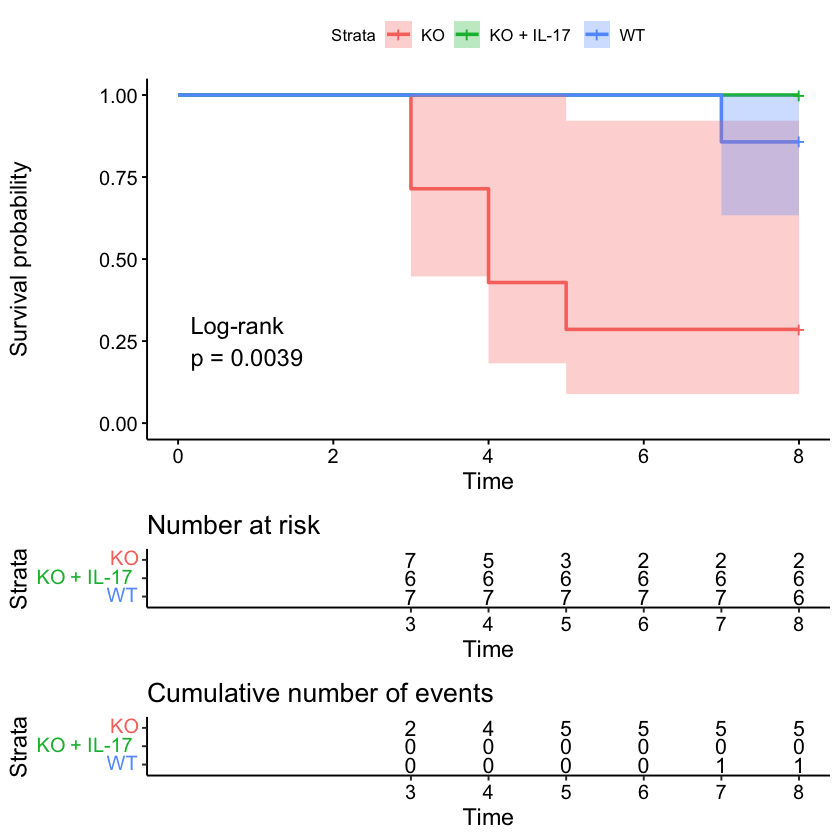

In [6]:
fit <- survfit(Surv(Survival_day, Death) ~ Genotype, data=metadata)
ggsurvplot(fit, data=metadata, conf.int=TRUE, pval=TRUE, pval.method=TRUE, tables.height=c(0.2, 0.2),
           risk.table=TRUE, cumevents=TRUE, legend.labs=c("KO", "KO + IL-17", "WT"))

In [7]:
# model weight
cox.model.weight <- coxph(Surv(Survival_day, Death)~Weight_D3, data=metadata)
summary(cox.model.weight)

Call:
coxph(formula = Surv(Survival_day, Death) ~ Weight_D3, data = metadata)

  n= 20, number of events= 6 

              coef exp(coef) se(coef)      z Pr(>|z|)   
Weight_D3 -0.22203   0.80089  0.08533 -2.602  0.00927 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
Weight_D3    0.8009      1.249    0.6776    0.9467

Concordance= 0.887  (se = 0.068 )
Likelihood ratio test= 9.55  on 1 df,   p=0.002
Wald test            = 6.77  on 1 df,   p=0.009
Score (logrank) test = 9.09  on 1 df,   p=0.003


### Interpretation
*Předpokládám, že tyhle modely asi už máte, protože ty s mikrobiomem nesouvisí, ale aspoň jsem si vyzkoušela, jak to funguje :D*<br>
**Model phenotype**<br>
We found that survival does have a significant relationship with phenotype (WT vs KO). The model fits quite well given the Likelihood, Wald and Score tests all have p < 0.05.<br>
At a given instant of time the probability of dying for a KO mouse is 9.0 times higher than for a WT mouse.<br>
**Model weight**<br>
We found that survival does have a significant relationship with weight (p=0.00927). The model fits quite well given the Likelihood, Wald and Score tests all have p < 0.05.<br>
At a given instant of time the probability of dying for a mouse which weighs 1g less is 1.2 times higher than for a mouse which weighs 1g more.

## Survival depending on alpha diversity

In [8]:
# model survival dependent on alpha diversity while adjusting for litter
cox.model.sha <- coxph(Surv(Survival_day, Death)~shannon_entropy, data=metadata)
summary(cox.model.sha)
cox.model.cha <- coxph(Surv(Survival_day, Death)~chao1, data=metadata)
summary(cox.model.cha)
cox.model.fai <- coxph(Surv(Survival_day, Death)~faith_pd, data=metadata)
summary(cox.model.fai)
cox.model.asv <- coxph(Surv(Survival_day, Death)~observed_features, data=metadata)
summary(cox.model.asv)

Call:
coxph(formula = Surv(Survival_day, Death) ~ shannon_entropy, 
    data = metadata)

  n= 20, number of events= 6 

                   coef exp(coef) se(coef)      z Pr(>|z|)  
shannon_entropy -0.5783    0.5608   0.3016 -1.917   0.0552 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                exp(coef) exp(-coef) lower .95 upper .95
shannon_entropy    0.5608      1.783    0.3105     1.013

Concordance= 0.784  (se = 0.086 )
Likelihood ratio test= 4.03  on 1 df,   p=0.04
Wald test            = 3.68  on 1 df,   p=0.06
Score (logrank) test = 4.43  on 1 df,   p=0.04


Call:
coxph(formula = Surv(Survival_day, Death) ~ chao1, data = metadata)

  n= 20, number of events= 6 

          coef exp(coef) se(coef)      z Pr(>|z|)
chao1 -0.03483   0.96577  0.02556 -1.363    0.173

      exp(coef) exp(-coef) lower .95 upper .95
chao1    0.9658      1.035    0.9186     1.015

Concordance= 0.706  (se = 0.103 )
Likelihood ratio test= 1.87  on 1 df,   p=0.2
Wald test            = 1.86  on 1 df,   p=0.2
Score (logrank) test = 2.01  on 1 df,   p=0.2


Call:
coxph(formula = Surv(Survival_day, Death) ~ faith_pd, data = metadata)

  n= 20, number of events= 6 

            coef exp(coef) se(coef)      z Pr(>|z|)
faith_pd -0.2517    0.7775   0.3989 -0.631    0.528

         exp(coef) exp(-coef) lower .95 upper .95
faith_pd    0.7775      1.286    0.3558     1.699

Concordance= 0.577  (se = 0.133 )
Likelihood ratio test= 0.39  on 1 df,   p=0.5
Wald test            = 0.4  on 1 df,   p=0.5
Score (logrank) test = 0.4  on 1 df,   p=0.5


Call:
coxph(formula = Surv(Survival_day, Death) ~ observed_features, 
    data = metadata)

  n= 20, number of events= 6 

                      coef exp(coef) se(coef)      z Pr(>|z|)
observed_features -0.03669   0.96397  0.02702 -1.358    0.175

                  exp(coef) exp(-coef) lower .95 upper .95
observed_features     0.964      1.037    0.9142     1.016

Concordance= 0.691  (se = 0.107 )
Likelihood ratio test= 1.84  on 1 df,   p=0.2
Wald test            = 1.84  on 1 df,   p=0.2
Score (logrank) test = 2  on 1 df,   p=0.2


### Interpretation
**Shannon**<br>
This model tells us there is almost a significant relationship between Shannon entropy and survival (p=0.0552). Also we can be quite confident this model is a good fit, given the Likelihood, Wald and Score tests have in general low p value.<br>
At a given instant of time the probability of dying for a mouse which has 1 less point in Shannon entropy is 1.8 times higher than for a mouse with 1 point more in Shannon entropy.<br>
**Chao1**<br>
This model is not reliable at all given the Likelihood, Wald and Score tests  all have p=0.2. Additionally, it does not identify a significant relationship between Faith's PD and survival (p=0.173).<br>
**Faith's phylogenetic diversity**<br>
This model is not reliable at all given the Likelihood, Wald and Score tests  all have p=0.5. Additionally, it does not identify a significant relationship between Faith's PD and survival (p=0.528).<br>
**ASV**<br>
This model is not reliable at all given the Likelihood, Wald and Score tests  all have p=0.2. Additionally, it does not identify a significant relationship between Faith's PD and survival (p=0.175).<br>

In [9]:
kruskal.test(shannon_entropy ~ Death_categ, data=metadata)


	Kruskal-Wallis rank sum test

data:  shannon_entropy by Death_categ
Kruskal-Wallis chi-squared = 3.9184, df = 1, p-value = 0.04776


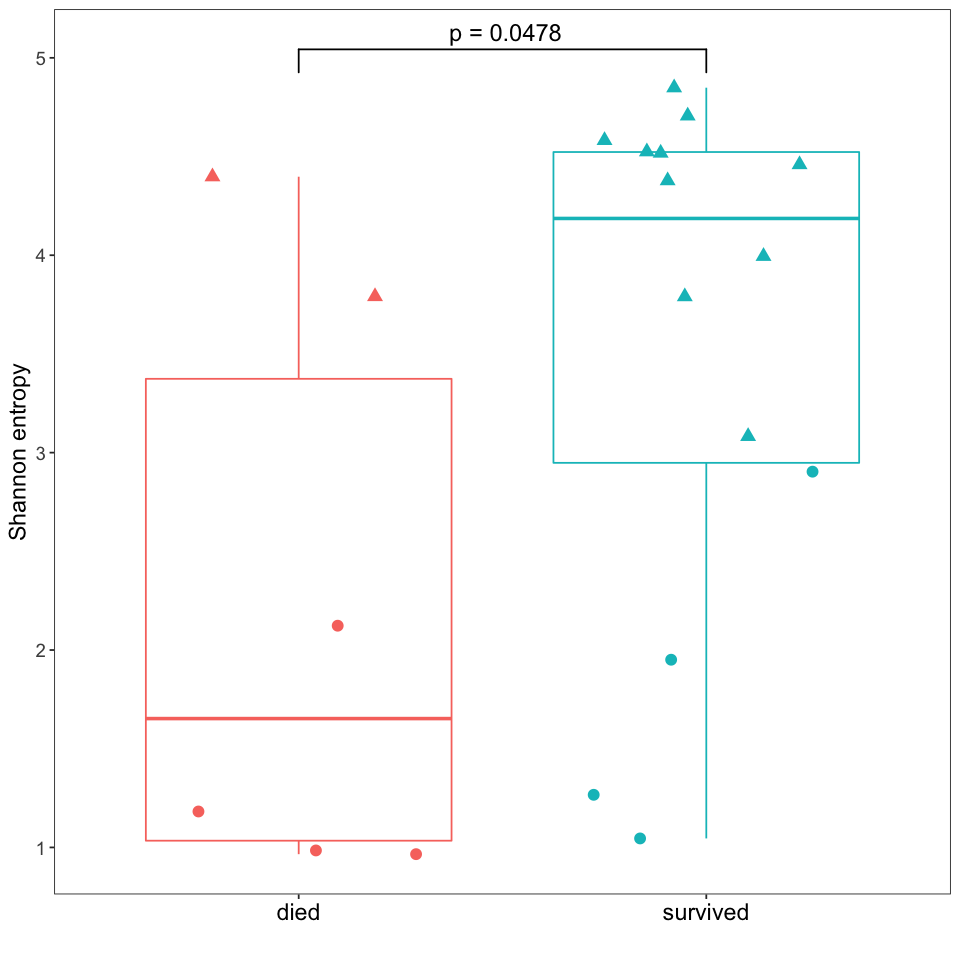

In [10]:
options(repr.plot.width=8, repr.plot.height=8)

ggplot(metadata, aes(y=shannon_entropy, x=Death_categ, color=Death_categ)) +
      geom_boxplot() +
      geom_jitter(width=0.3, size=3, aes(shape=Litter)) +
      geom_signif(comparisons=list(c("died", "survived")), annotations=" p = 0.0478", textsize=5, color='black') +
      labs(x="", y="Shannon entropy") +
      theme_bw() +
      theme(panel.grid=element_blank(), legend.position="none",
            text=element_text(size=14, colour="black"),
            axis.text.x = element_text(size = 14, colour = "black"))

## Survival depending on beta diversity

In [11]:
# load beta diversity pca coordinates
bray.pca <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_litter12/beta/bray_curtis_pca_exported.tsv", sep='\t')
jacc.pca <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_litter12/beta/jaccard_pca_exported.tsv", sep='\t')
uuni.pca <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_litter12/beta/unweighted_unifrac_pca_exported.tsv", sep='\t')
wuni.pca <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_litter12/beta/weighted_unifrac_pca_exported.tsv", sep='\t')

# add beta diversity PC1 to metadata
metadata$Bray_PC1 <- bray.pca$PC1
metadata$Jacc_PC1 <- jacc.pca$PC1
metadata$Uuni_PC1 <- uuni.pca$PC1
metadata$Wuni_PC1 <- wuni.pca$PC1
metadata$Bray_PC2 <- bray.pca$PC2
metadata$Jacc_PC2 <- jacc.pca$PC2
metadata$Uuni_PC2 <- uuni.pca$PC2
metadata$Wuni_PC2 <- wuni.pca$PC2

In [12]:
# model survival dependent on beta diversity while adjusting for litter
cox.model.bray <- coxph(Surv(Survival_day, Death)~Bray_PC1, data=metadata)
summary(cox.model.bray)
cox.model.jacc <- coxph(Surv(Survival_day, Death)~Jacc_PC1, data=metadata)
summary(cox.model.jacc)
cox.model.uuni <- coxph(Surv(Survival_day, Death)~Uuni_PC1, data=metadata)
summary(cox.model.uuni)
cox.model.wuni <- coxph(Surv(Survival_day, Death)~Wuni_PC1, data=metadata)
summary(cox.model.wuni)

Call:
coxph(formula = Surv(Survival_day, Death) ~ Bray_PC1, data = metadata)

  n= 20, number of events= 6 

            coef exp(coef) se(coef)      z Pr(>|z|)  
Bray_PC1 -1.9272    0.1455   1.0704 -1.801   0.0718 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

         exp(coef) exp(-coef) lower .95 upper .95
Bray_PC1    0.1455      6.871   0.01786     1.186

Concordance= 0.825  (se = 0.08 )
Likelihood ratio test= 3.7  on 1 df,   p=0.05
Wald test            = 3.24  on 1 df,   p=0.07
Score (logrank) test = 3.98  on 1 df,   p=0.05


Call:
coxph(formula = Surv(Survival_day, Death) ~ Jacc_PC1, data = metadata)

  n= 20, number of events= 6 

            coef exp(coef) se(coef)      z Pr(>|z|)
Jacc_PC1 -1.9252    0.1458   1.1803 -1.631    0.103

         exp(coef) exp(-coef) lower .95 upper .95
Jacc_PC1    0.1458      6.857   0.01443     1.474

Concordance= 0.732  (se = 0.09 )
Likelihood ratio test= 2.84  on 1 df,   p=0.09
Wald test            = 2.66  on 1 df,   p=0.1
Score (logrank) test = 3.09  on 1 df,   p=0.08


Call:
coxph(formula = Surv(Survival_day, Death) ~ Uuni_PC1, data = metadata)

  n= 20, number of events= 6 

             coef exp(coef) se(coef)      z Pr(>|z|)  
Uuni_PC1 -4.47561   0.01138  2.57133 -1.741   0.0818 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

         exp(coef) exp(-coef) lower .95 upper .95
Uuni_PC1   0.01138      87.85 7.371e-05     1.758

Concordance= 0.742  (se = 0.108 )
Likelihood ratio test= 3.35  on 1 df,   p=0.07
Wald test            = 3.03  on 1 df,   p=0.08
Score (logrank) test = 3.6  on 1 df,   p=0.06


Call:
coxph(formula = Surv(Survival_day, Death) ~ Wuni_PC1, data = metadata)

  n= 20, number of events= 6 

          coef exp(coef) se(coef)     z Pr(>|z|)
Wuni_PC1 1.429     4.175    1.837 0.778    0.437

         exp(coef) exp(-coef) lower .95 upper .95
Wuni_PC1     4.175     0.2395    0.1141     152.8

Concordance= 0.557  (se = 0.129 )
Likelihood ratio test= 0.77  on 1 df,   p=0.4
Wald test            = 0.61  on 1 df,   p=0.4
Score (logrank) test = 0.59  on 1 df,   p=0.4


In [13]:
# model survival dependent on beta diversity while adjusting for litter
cox.model2.bray <- coxph(Surv(Survival_day, Death)~Bray_PC1+Bray_PC2, data=metadata)
summary(cox.model2.bray)
cox.model2.jacc <- coxph(Surv(Survival_day, Death)~Jacc_PC1+Jacc_PC2, data=metadata)
summary(cox.model2.jacc)
cox.model2.uuni <- coxph(Surv(Survival_day, Death)~Uuni_PC1+Uuni_PC2, data=metadata)
summary(cox.model2.uuni)
cox.model2.wuni <- coxph(Surv(Survival_day, Death)~Wuni_PC1+Wuni_PC2, data=metadata)
summary(cox.model2.wuni)

Call:
coxph(formula = Surv(Survival_day, Death) ~ Bray_PC1 + Bray_PC2, 
    data = metadata)

  n= 20, number of events= 6 

            coef exp(coef) se(coef)      z Pr(>|z|)  
Bray_PC1 -2.0848    0.1243   1.1680 -1.785   0.0743 .
Bray_PC2 -1.3809    0.2513   1.9577 -0.705   0.4806  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

         exp(coef) exp(-coef) lower .95 upper .95
Bray_PC1    0.1243      8.043  0.012601     1.227
Bray_PC2    0.2513      3.979  0.005418    11.660

Concordance= 0.784  (se = 0.086 )
Likelihood ratio test= 4.19  on 2 df,   p=0.1
Wald test            = 3.21  on 2 df,   p=0.2
Score (logrank) test = 4.14  on 2 df,   p=0.1


Call:
coxph(formula = Surv(Survival_day, Death) ~ Jacc_PC1 + Jacc_PC2, 
    data = metadata)

  n= 20, number of events= 6 

             coef exp(coef) se(coef)      z Pr(>|z|)  
Jacc_PC1 -2.53418   0.07933  1.50474 -1.684   0.0922 .
Jacc_PC2  2.95692  19.23853  2.51314  1.177   0.2394  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

         exp(coef) exp(-coef) lower .95 upper .95
Jacc_PC1   0.07933   12.60605  0.004155     1.514
Jacc_PC2  19.23853    0.05198  0.139631  2650.702

Concordance= 0.763  (se = 0.087 )
Likelihood ratio test= 4.51  on 2 df,   p=0.1
Wald test            = 2.91  on 2 df,   p=0.2
Score (logrank) test = 3.93  on 2 df,   p=0.1


Call:
coxph(formula = Surv(Survival_day, Death) ~ Uuni_PC1 + Uuni_PC2, 
    data = metadata)

  n= 20, number of events= 6 

              coef exp(coef)  se(coef)      z Pr(>|z|)  
Uuni_PC1 -4.660899  0.009458  2.700693 -1.726   0.0844 .
Uuni_PC2 -4.733263  0.008798  2.541129 -1.863   0.0625 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

         exp(coef) exp(-coef) lower .95 upper .95
Uuni_PC1  0.009458      105.7 4.753e-05     1.882
Uuni_PC2  0.008798      113.7 6.044e-05     1.281

Concordance= 0.701  (se = 0.129 )
Likelihood ratio test= 6.47  on 2 df,   p=0.04
Wald test            = 6.96  on 2 df,   p=0.03
Score (logrank) test = 11.2  on 2 df,   p=0.004


Call:
coxph(formula = Surv(Survival_day, Death) ~ Wuni_PC1 + Wuni_PC2, 
    data = metadata)

  n= 20, number of events= 6 

             coef exp(coef) se(coef)      z Pr(>|z|)
Wuni_PC1  0.93138   2.53801  1.28254  0.726    0.468
Wuni_PC2 -3.72530   0.02411  2.38741 -1.560    0.119

         exp(coef) exp(-coef) lower .95 upper .95
Wuni_PC1   2.53801      0.394 0.2054903    31.347
Wuni_PC2   0.02411     41.483 0.0002238     2.596

Concordance= 0.763  (se = 0.091 )
Likelihood ratio test= 3.6  on 2 df,   p=0.2
Wald test            = 3.06  on 2 df,   p=0.2
Score (logrank) test = 3.68  on 2 df,   p=0.2


In [14]:
# copmarison of the models with one vs two predictors
anova.bray <- anova(cox.model.bray, cox.model2.bray, test="LRT")
anova.jacc <- anova(cox.model.jacc, cox.model2.jacc, test="LRT")
anova.uuni <- anova(cox.model.uuni, cox.model2.uuni, test="LRT")
anova.wuni <- anova(cox.model.wuni, cox.model2.wuni, test="LRT")
anova.bray
anova.jacc
anova.uuni
anova.wuni

,loglik,Chisq,Df,P(>|Chi|)
,<dbl>,<dbl>,<int>,<dbl>
1,-15.29552,NA,NA,NA
2,-15.04767,0.4956902,1,0.4814


,loglik,Chisq,Df,P(>|Chi|)
,<dbl>,<dbl>,<int>,<dbl>
1,-15.72616,NA,NA,NA
2,-14.89158,1.669168,1,0.19637


,loglik,Chisq,Df,P(>|Chi|)
,<dbl>,<dbl>,<int>,<dbl>
1,-15.47121,NA,NA,NA
2,-13.90729,3.127844,1,0.07696546


,loglik,Chisq,Df,P(>|Chi|)
,<dbl>,<dbl>,<int>,<dbl>
1,-16.75886,NA,NA,NA
2,-15.34210,2.833516,1,0.09231606


### Interpretation
In this section we tested the survival dependence on beta diversity. In total, we tested two scenarios: **(1)** in the first scenario we used only the major principal coordinate axis (PC1) as a survival predictor, **(2)** in the second scenario we used two principal coordinate axes (PC1, PC2) as predictors. We compared these two scenarios using Likelihood ratio test and found out that using both PC axes results in slightly better models. Therefore, we decided to use the models with two predictors (PC1, PC2).<br>
**Bray-Curtis**<br>
This models tells us there is no significant relationship between first two PCoA axes (beta diversity) and survival. However, this model is not a good fit, given the Likelihood, Wald and Score tests all have p>0.05.<br>
**Jaccard**<br>
This models tells us there is no significant relationship between first two PCoA axes (beta diversity) and survival. However, this model is not a good fit, given the Likelihood, Wald and Score tests all have p>0.05.<br>
**unweighted UniFrac**<br>
This models tells us there is no significant relationship between PC1 and survival (p=0.084) while there is a significant relationship bwteen PC2 and survival (p=0.063). Also we can be quite confident this model is a good fit, given the Likelihood, Wald and Score tests all have p<0.05.<br>
**weighted UniFrac**<br>
This models tells us there is no significant relationship between first two PCoA axes (beta diversity) and survival. However, this model is not a good fit, given the Likelihood, Wald and Score tests all have p>0.05.<br>
Taken together, we have not found an effect of beta diversity on survival while controlling litter as a random effect.

## Survival depending on taxonomy

In [15]:
# load taxonomy data
tax_data <- read_tsv("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/taxonomy_raref_1192/taxonomy-L6-abs.tsv", skip=1)
tax_id <- tax_data$`#OTU ID`
tax_data <- data.frame(tax_data[, -1], check.names = FALSE)
rownames(tax_data) <- tax_id
tax_data <- t(tax_data)

tax_data_rel <- read_tsv("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/taxonomy_raref_1192/taxonomy-L6-rel.tsv", skip=1)
tax_id <- tax_data_rel$`#OTU ID`
tax_data_rel <- data.frame(tax_data_rel[, -1], check.names = FALSE)
rownames(tax_data_rel) <- tax_id
tax_data_rel <- t(tax_data_rel)

# merge alpha diversity with metadata
tax_data <- merge(tax_data, metadata, by.x=0, by.y=c("SampleID"))
tax_wtko <- filter(tax_data, Genotype=="KO" | Genotype=="WT")
tax_wtko17 <- filter(tax_data, Genotype=="WT" | Genotype=="KO_IL17")
tax_koko17 <- filter(tax_data, Genotype=="KO" | Genotype=="KO_IL17")
tax_data_rel <- merge(tax_data_rel, metadata, by.x=0, by.y=c("SampleID"))


Rows: 49 Columns: 42

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): #OTU ID
dbl (41): I-KO-1, I-KO-2, I-KO-3, I-KO-4, I-KO-BAC, I-WT-1, I-WT-2, I-WT-3, ...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 49 Columns: 42

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): #OTU ID
dbl (41): I-KO-1, I-KO-2, I-KO-3, I-KO-4, I-KO-BAC, I-WT-1, I-WT-2,

#### all 3 groups WT, KO, KO+IL-17

In [16]:
# survival all 3 groups WT, KO, KO+IL-17

taxa <- seq_along(tax_data)[2:49]
pvals <- as.numeric()
exp_coef <- as.numeric()

# apply coxph model on each taxon and store pval and coeficient
options(warn=-1)
for (taxon in taxa)
{
  cox.model.tax <- coxph(Surv(tax_data$Survival_day, tax_data$Death)~tax_data[,taxon]+(1|tax_data$Litter_num))
  pvals[taxon]<-summary(cox.model.tax)$coefficients[,5]
  exp_coef[taxon]<-summary(cox.model.tax)$coefficients[,2]
  assign(paste0("model_", taxon), cox.model.tax)
}

# correct for multiple hypothesis testing
qval <- p.adjust(pvals, "BH")

# organize results in a table
table<-data.frame(Taxa=colnames(tax_data)[2:49], model_num=taxa, p_values=pvals[-1], BH_corr=qval[-1], exp_coef=exp_coef[-1])
write.table(table,"/Users/dagmarschierova/MEGA/IMG/study_5_revisions/statistic_results/survival_taxon.tsv",
            row.names = F, quote = F, sep="\t")
options(warn=0)

In [17]:
kruskal_rum <- kruskal.test(`k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus` ~ Death_categ, data=tax_data)
kruskal_bla <- kruskal.test(`k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia` ~ Death_categ, data=tax_data)
kruskal_xan <- kruskal.test(`k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;__` ~ Death_categ, data=tax_data)
kruskal_rum
kruskal_bla
kruskal_xan


	Kruskal-Wallis rank sum test

data:  k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus by Death_categ
Kruskal-Wallis chi-squared = 4.9123, df = 1, p-value = 0.02667



	Kruskal-Wallis rank sum test

data:  k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia by Death_categ
Kruskal-Wallis chi-squared = 2.5347, df = 1, p-value = 0.1114



	Kruskal-Wallis rank sum test

data:  k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;__ by Death_categ
Kruskal-Wallis chi-squared = 3.8218, df = 1, p-value = 0.05059


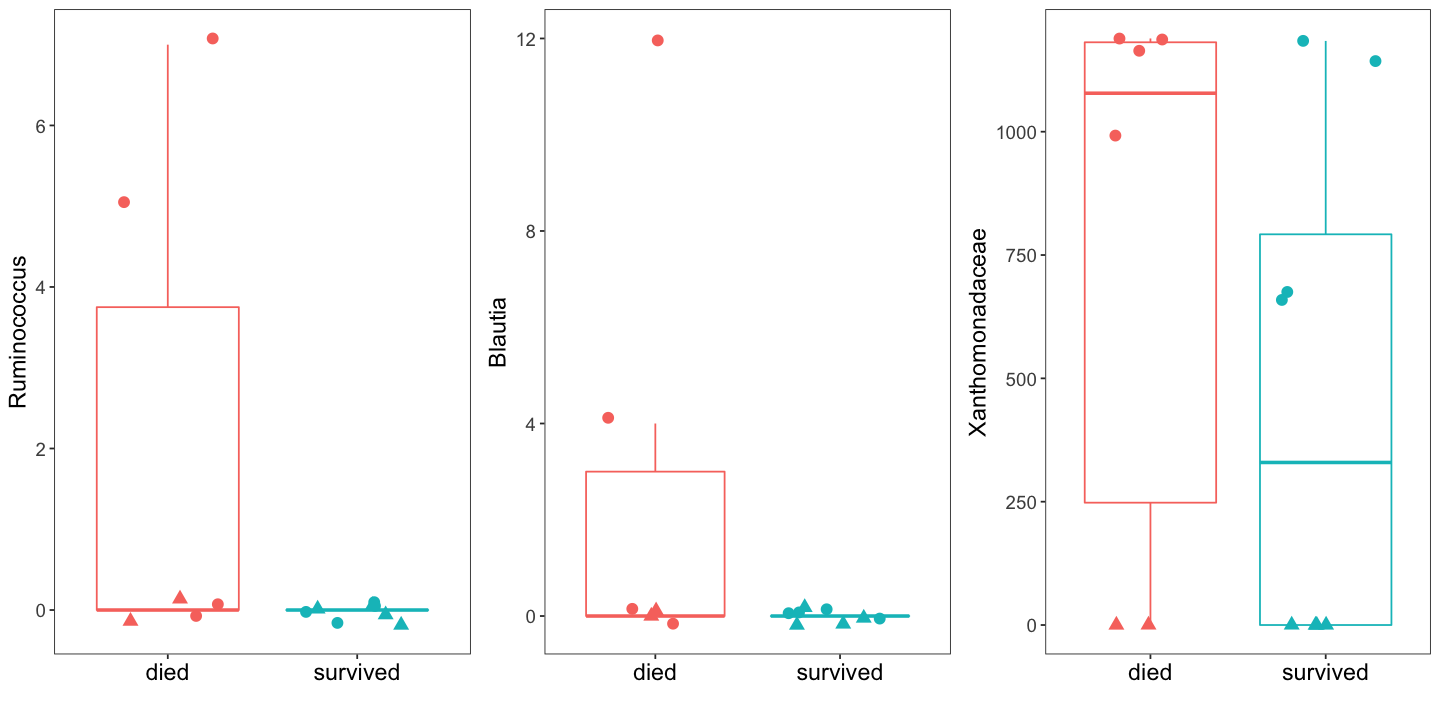

In [18]:
options(repr.plot.width=12, repr.plot.height=6)

ruminococcus <- ggplot(tax_wtko, aes(y=`k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus`,
                     x=Death_categ, color=Death_categ)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=3, aes(shape=Litter)) +
      labs(x="", y="Ruminococcus") +
      theme_bw() +
      theme(panel.grid=element_blank(), legend.position="none",
            text=element_text(size=14, colour="black"),
            axis.text.x = element_text(size=14, colour = "black"))

blautia <- ggplot(tax_wtko, aes(y=`k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia`,
                     x=Death_categ, color=Death_categ)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=3, aes(shape=Litter)) +
      labs(x="", y="Blautia") +
      theme_bw() +
      theme(panel.grid=element_blank(), legend.position="none",
            text=element_text(size=14, colour="black"),
            axis.text.x = element_text(size=14, colour = "black"))

xanthomonadaceae <- ggplot(tax_wtko, aes(y=`k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;__`,
                     x=Death_categ, color=Death_categ)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=3, aes(shape=Litter)) +
      labs(x="", y="Xanthomonadaceae") +
      theme_bw() +
      theme(panel.grid=element_blank(), legend.position="none",
            text=element_text(size=14, colour="black"),
            axis.text.x = element_text(size=14, colour = "black"))

# combine plots
plt_tax_wtko <- ggarrange(ruminococcus, blautia, xanthomonadaceae,
                        ncol=3, nrow=1)
plt_tax_wtko

In [19]:
write.table(tax_data,"/Users/dagmarschierova/MEGA/IMG/study_5_revisions/statistic_results/survival_data_L6-abs.tsv",
            row.names = F, quote = F, sep="\t")
write.table(tax_data_rel,"/Users/dagmarschierova/MEGA/IMG/study_5_revisions/statistic_results/survival_data_L6-rel.tsv",
            row.names = F, quote = F, sep="\t")